<a href="https://colab.research.google.com/github/bggonza6/CHM343/blob/main/lab_2_bomb_calorimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASU CHM 343 Physical Chemistry Lab 2 - Notebook**
##*Measuring Heat Change to calculate molar enthalpy of combustion*

14Feb2025

**Blake Gonzales**, bggonza6@asu.edu

# **Abstract**

A bomb calorimetry was performed and the C_eq for the calorimeter was calculated to be 10.2 kJ/K +/- 6 kJ/K using benzoic acid. The delta T and molar enthalpy of combustion were calculated for Benzoic Acid, Naphthalene, Lauric Acid, and Glucose. Observations regarding the length of Lauric Acid's carbon chain are made in relation to its performance in the bomb calorimeter.

# **Set up Notebook Environment**


In [1]:
# Primary Python Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in Bomb Cal Simulated Data

df_ba_3336 = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/data_benzoic_acid_cc3336.csv', sep = "," , header=11, skiprows=[11])

In [9]:

# Read in Bomb Cal Simulated Data - Naphthalene
df_nap_3336 = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/data_naphthalene_cc3336.csv', sep = "," , header=11, skiprows=[11])

In [13]:
# Read in Bomb Cal Simulated Data

df_la_3336 = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/data_lauric_acid_cc3336.csv', sep = "," , header=11, skiprows=[11])

In [17]:
# Read in Bomb Cal Simulated Data

df_glu_3336 = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/data_glucose_cc3336.csv', sep = "," , header=11, skiprows=[11])

# **Introduction**

A bomb calorimeter is used to measure the heat created by a sample burned under an oxygen atmosphere in a closed vessel (1). The problem investigated in this lab was to determine the heat capacity of the system, calculate the energy change per mole of sample for the process, calculate the enthalpy change, and calculate the observed enthalpy of reaction. The calorimeter is designed to minimize the transfer of heat between the inside and outside, ensuring accurate measurements (2). This web-based experiment utilizes a Parr Oxygen Bomb Combustion Calorimeter, a isoperibol type. Isoperibol refers to a small controlled heat exchange that is permitted (2). The difference in heats of combustion immediately reflects the difference in energy of the molecules (3).


# **Methods**

A remote bomb calorimeter was accessed at this link https://asu-molecular-sciences-cloud-lab.github.io/bomb_calorimetry_v2/#/experiment. The 4-digit code corresponding to the chosen calorimeter was #3336. Benzoic acid was selected and taken to the scale for a 2g sample to be weighed out. An initial water temperature was chosen, the initial wire weight was recorded, 2L of water was added, 30 atm of oxygen was added to the calorimeter and the sample was ignited. The final wire weight was recorded after ignition and the collected data contains bomb calorimetry data of time vs. temp and was used for data analysis. All of the other parameters during collection were summarized on the file as well. A linear least squares regression of first and last data points was performed to obtain a vertical line that equated 2 enclosed areas utilized to calculate delta T for Benzoic Acid. The energy equivalent of benzoic acid and iron wire was provided and used to calculate E released in the combustion. Due to benzoic acid having well known values, energy released was used to calculate calorimeter constant, Ceq.
\begin{equation}
{C}_{eq} = \frac{{E}_{released}}{-\Delta T}\tag{Eq. 1}
\end{equation}
 This listed process was repeated with a 2g sample of naphthalene, lauric acid, and glucose and the data was graphed in similar fashion to determine each delta T. The number of moles, n, burned in the experiment was then calculated by dividing wt of the sample by molar mass, M. The total energy released, delta U, was calculated using Ceq and correcting for the change in mass of the wire burning. The energy released per mole of compound burned, delta U bar, was calculated by dividing delta U by n. A balanced combustion reaction was written out and delta N_gas was calculated by subtracting moles of O_2 consumed by moles of CO_2 formed. The molar enthalpy of combustion, delta H bar, was then calculated by adding delta U bar to delta N_gas*R*T.
 \begin{equation}
{\Delta H}=({C}_{eq}{\Delta T } +{q}_{corr})/n + {R}{T}{\Delta N}_{gas}\tag{Eq. 2}
\end{equation}

 This value was then divided by 1000 to get delta H bar_comb in kJ/mol. The standard deviation of temperature represents the random statistical error in the temperature data. It was calculated using the np.std() function from the numpy library. The error in ΔT was be estimated using the formula for error propatation. The error in T_final and T_initial were used to calculate the error in ΔT. The error in C_eq was calculated as well.

# **Results & Discussion**



The heat capacity of the system was determined using a standard reference material and the calculations are included in supplemental information. The energy change per mol of sample was calculated for all samples ran and included in supplemental information. The molar enthalpy change was determined for each sample and is included in supplemental information. The enthalpy of reaction was also calculated and included in supplemental information. Following this, an error analysis was performed. Naphthalene had the highest amount of energy released, which is predicted to be from having a higher carbon to hydrogen ratio. The Lauric Acid had the highest energy release per mole which is hypothesized to be due to it having a high enthalpy of combustion. This would mean that as it burns, it releases a significant amount of heat per mole of lauric acid consumed, because of its long hydrocarbon chain structure. Lauric acid also had the highest molar enthalpy of combustion which implying it releases a significant amount of heat when burned due to its long carbon chain. This lab utilized computational and simulated experimental calorimetry techniques to compare combustion of various samples.

During the course of this lab, molecalc.clouc was unreliable and failed to run gamess at times.

Delta T for:
Benzoic Acid: 5.13 C +/- 3 C
Naphthalene: 7.83 C +/- 5 C
Lauric Acid: 7.21 C +/- 4 C
Glucose: 3.06 C +/- 2 C

In [4]:
#@title Determine ΔT of Benzoic Acid to calculate C_eq
# Linear Extrapolation of starting and ending
Number_Points = 10
Bomb_Cal_Initial = df_ba_3336[df_ba_3336.index.start:df_ba_3336.index.start+Number_Points]
Bomb_Cal_Final = df_ba_3336[df_ba_3336.index.stop-1-Number_Points:df_ba_3336.index.stop-1]

# Linear fits for initial and final data points
mi, bi = np.polyfit(Bomb_Cal_Initial['Time (s)'], Bomb_Cal_Initial['Temperature (C)'], deg=1)
mf, bf = np.polyfit(Bomb_Cal_Final['Time (s)'], Bomb_Cal_Final['Temperature (C)'], deg=1)

# Estimate Delta T from linear extrapolations
guess_temp = 375
dt = ((bf + mf * guess_temp) - (bi + mi * guess_temp))

# Estimate Delta T from max/min (good estimate if water temp is > room temp)
dt_est = df_ba_3336['Temperature (C)'].max() - df_ba_3336['Temperature (C)'].min()

# Estimate Delta T from linear extrapolations
guess_tmin = 300
guess_tmax = 500
dt_min = ((bf + mf * guess_tmin) - (bi + mi * guess_tmin))
dt_max = ((bf + mf * guess_tmax) - (bi + mi * guess_tmax))

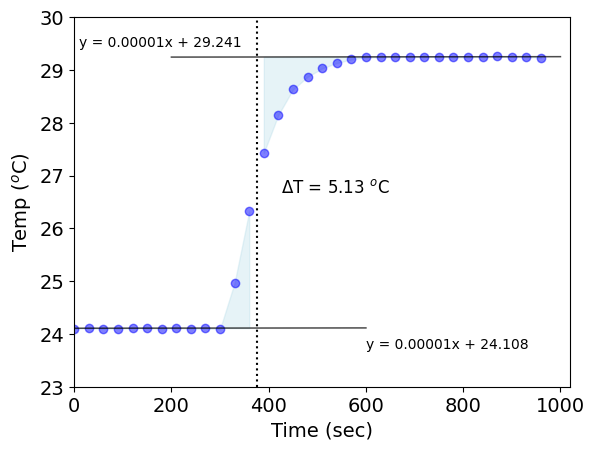

In [5]:
#@title Plot Data and ΔT Determination
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_ba_3336['Time (s)'], df_ba_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Benzoic Acid')

# Create linear sequences for fit lines
xseq_initial = np.linspace(0, 600, num=10)
xseq_final = np.linspace(200, 1000, num=10)

# Plot extrapolation lines
ax.plot(xseq_initial, bi + mi * xseq_initial, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq_final, bf + mf * xseq_final, alpha=0.7, color="k", lw=1.1)

# Draw a vertical line for temperature change
ax.axvline(x=guess_temp, color='k', linestyle='dotted')

# Fill between data and linear extrapolations
ax.fill_between(df_ba_3336['Time (s)'],bi + mi * df_ba_3336['Time (s)'], df_ba_3336['Temperature (C)'],where=df_ba_3336['Time (s)']<=guess_temp , interpolate=True, color='lightblue', alpha=0.3)

ax.fill_between(df_ba_3336['Time (s)'],bf + mf * df_ba_3336['Time (s)'], df_ba_3336['Temperature (C)'],where=df_ba_3336['Time (s)']>=guess_temp , interpolate=True, color='lightblue', alpha=0.3)


# Annotate ΔT
ax.text(guess_temp+50, (df_ba_3336['Temperature (C)'].min() + (df_ba_3336['Temperature (C)'].max() - df_ba_3336['Temperature (C)'].min())/2), '$\Delta$T = {} $^o$C'.format(round(dt, 2)), fontsize=12)

# Annotate regression lines with equations
ax.annotate(f'y = {mi:.5f}x + {bi:.3f}', xy=(xseq_initial[-1], bi + mi * xseq_initial[-1]), xytext=(600, bi + mi * xseq_initial[-1] - 0.4),fontsize=10)

ax.annotate(f'y = {mf:.5f}x + {bf:.3f}', xy=(xseq_final[0], bf + mf * xseq_final[0]), xytext=(10, bf + mf * xseq_final[0] + 0.2),fontsize=10)

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1020)
plt.ylim(23, 30)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 1 - plot of temp vs. time for the combustion of Benzoic Acid. The beginning and final points have a linear least squares regression applied to split the area equally to determine delta T.

In [6]:
#@title Calculate Calorimeter Constant
Hba = 26425
Hfe = 5858
Wba = 2.0
Wfe = 0.027-0.022
Erel = (Hba*Wba)+(Hfe*Wfe)
Ceq = Erel/dt

print('Ceq =', round(Ceq,2))

Ceq = 10301.16


# **References**


1) [Calories in Food Bomb Calorimeter](https://biopchem.wordpress.com/wp-content/uploads/2025/02/calories_in_food_bomb_calorimeter_2007.pdf)

2) [Bomb Calorimetry Simulator Discussion](https://asu-molecular-sciences-cloud-lab.github.io/bomb_calorimetry_v2/#/discussion.)

3) Information • Textbooks • Media • Resources. https://biopchem.wordpress.com/wp-content/uploads/2025/02/bomb_cal_naphthalene_azulene_jce98.pdf (accessed 2025-02-14).

4) [Bomb Calorimeter](https://asu-molecular-sciences-cloud-lab.github.io/bomb_calorimetry_v2/#/)

5) [MoleCalc](https://molecalc.cloud/)

6) [Bomb Calorimetry Instructions](https://asu-molecular-sciences-cloud-lab.github.io/bomb_calorimetry_v2/#/instructions)

7) [Bomb Calorimetry Handout](https://biopchem.education/wp-content/uploads/2025/01/lab2_thermochemistry_handout_chm343_spring2025.pdf)

8) CHM343. Colab-Notebooks/Data_and_Error_Analysis_Overview_Pchem_Lab.ipynb at main · CHM343/Colab-Notebooks. GitHub. https://github.com/CHM343/Colab-Notebooks/blob/main/Data_and_Error_Analysis_Overview_Pchem_Lab.ipynb (accessed 2025-02-12).

9) [Benzoic Acid](https://molecalc.cloud/calculations/da5d1d14cc9d696aa0668bdbd3fe099d)

10) [Naphthalene](https://molecalc.cloud/calculations/a58e24dfb295dae96f87882517e34940)

11) [Lauric Acid](https://en.wikipedia.org/wiki/Lauric_acid#:~:text=Lauric%20acid%2C%20systematically%20dodecanoic%20acid,acid%20are%20known%20as%20laurates.)

12) [Glucose](https://en.wikipedia.org/wiki/Glucose)






# **Supplemental Information**



Peer Assistance -

February 3rd replying to Christopher's thread

February 4th replying to Brayden's thread

February 6th replying to Shaina's thread

February 7th replying to Liye's threads

February 14 replying to Mackenzie's thread





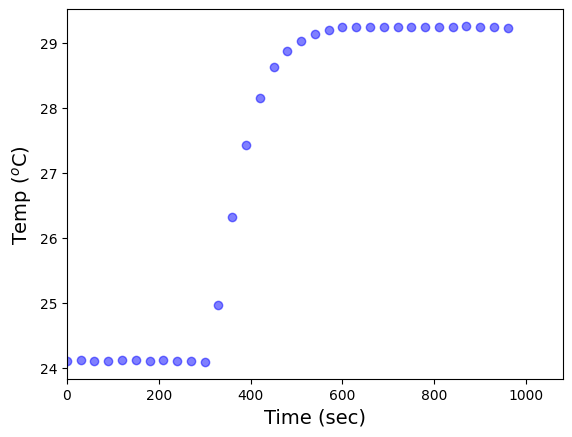

In [3]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_ba_3336['Time (s)'], df_ba_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Benzoic Acid')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1080)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 2 - Plot of temp vs. time during the combustion of Benzoic Acid

In [7]:
#@title Thermodynamic Estimate - Minimum and Maximum
Ceq_min = Erel/dt_min
Ceq_max = Erel/dt_max

print('Ceq,min =', round(Ceq_min,2), " ", 'Ceq,max =', round(Ceq_max,2))

Ceq,min = 10301.16   Ceq,max = 10301.16


In [8]:
#@title Horizontal Line Thermodynamic Estimate (Over-Estimate)
Ceq = Erel/dt_est
print('Ceq =', round(Ceq,2))

Ceq = 10228.1


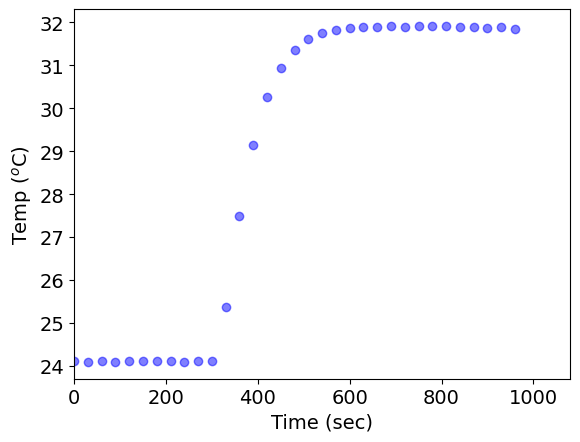

In [10]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_nap_3336['Time (s)'], df_nap_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'naphthalene')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1080)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 3 - plot of temp vs time during the combustion of Naphthalene

In [11]:
#@title Determine ΔT for Naphthalene
# Linear Extrapolation of starting and ending
Number_Points_nap = 10
Bomb_Cal_Initial_nap = df_nap_3336[df_nap_3336.index.start:df_nap_3336.index.start+Number_Points_nap]
Bomb_Cal_Final_nap = df_nap_3336[df_nap_3336.index.stop-1-Number_Points_nap:df_nap_3336.index.stop-1]

# Linear fits for initial and final data points
mi_nap, bi_nap = np.polyfit(Bomb_Cal_Initial_nap['Time (s)'], Bomb_Cal_Initial_nap['Temperature (C)'], deg=1)
mf_nap, bf_nap = np.polyfit(Bomb_Cal_Final_nap['Time (s)'], Bomb_Cal_Final_nap['Temperature (C)'], deg=1)

# Estimate Delta T from linear extrapolations
guess_temp_nap = 375
dt_nap = ((bf_nap + mf_nap * guess_temp_nap) - (bi_nap + mi_nap * guess_temp_nap))

# Estimate Delta T from max/min (good estimate if water temp is > room temp)
dt_est_nap = df_nap_3336['Temperature (C)'].max() - df_nap_3336['Temperature (C)'].min()

# Estimate Delta T from linear extrapolations
guess_tmin_nap = 300
guess_tmax_nap = 500
dt_min_nap = ((bf_nap + mf_nap * guess_tmin_nap) - (bi_nap + mi_nap * guess_tmin_nap))
dt_max_nap = ((bf_nap + mf_nap * guess_tmax_nap) - (bi_nap + mi_nap * guess_tmax_nap))

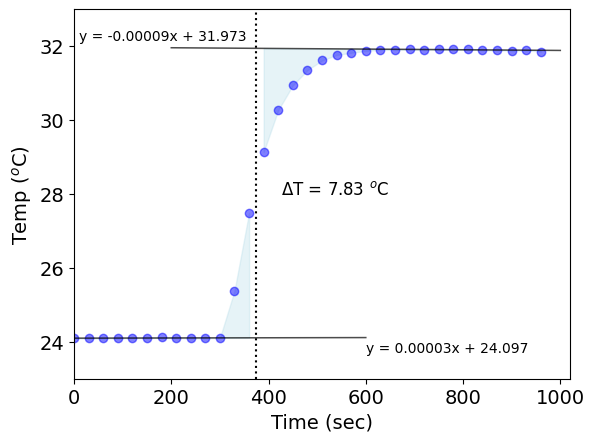

In [12]:
#@title Plot Data and ΔT Determination of Naphthalene
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_nap_3336['Time (s)'], df_nap_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Naphtahlene')

# Create linear sequences for fit lines
xseq_initial_nap = np.linspace(0, 600, num=10)
xseq_final_nap = np.linspace(200, 1000, num=10)

# Plot extrapolation lines
ax.plot(xseq_initial_nap, bi_nap + mi_nap * xseq_initial_nap, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq_final_nap, bf_nap + mf_nap * xseq_final_nap, alpha=0.7, color="k", lw=1.1)

# Draw a vertical line for temperature change
ax.axvline(x=guess_temp_nap, color='k', linestyle='dotted')

# Fill between data and linear extrapolations
ax.fill_between(df_nap_3336['Time (s)'],bi_nap + mi_nap * df_nap_3336['Time (s)'], df_nap_3336['Temperature (C)'],where=df_nap_3336['Time (s)']<=guess_temp_nap , interpolate=True, color='lightblue', alpha=0.3)

ax.fill_between(df_nap_3336['Time (s)'],bf_nap + mf_nap * df_nap_3336['Time (s)'], df_nap_3336['Temperature (C)'],where=df_nap_3336['Time (s)']>=guess_temp_nap , interpolate=True, color='lightblue', alpha=0.3)


# Annotate ΔT
ax.text(guess_temp_nap+50, (df_nap_3336['Temperature (C)'].min() + (df_nap_3336['Temperature (C)'].max() - df_nap_3336['Temperature (C)'].min())/2), '$\Delta$T = {} $^o$C'.format(round(dt_nap, 2)), fontsize=12)

# Annotate regression lines with equations
ax.annotate(f'y = {mi_nap:.5f}x + {bi_nap:.3f}', xy=(xseq_initial_nap[-1], bi_nap + mi_nap * xseq_initial_nap[-1]), xytext=(600, bi_nap + mi_nap * xseq_initial_nap[-1] - 0.4),fontsize=10)

ax.annotate(f'y = {mf_nap:.5f}x + {bf_nap:.3f}', xy=(xseq_final_nap[0], bf_nap + mf_nap * xseq_final_nap[0]), xytext=(10, bf_nap + mf_nap * xseq_final_nap[0] + 0.2),fontsize=10)

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1020)
plt.ylim(23, 33)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 4 - Plot of temp vs time with linear least squares regression to determind delta T for Naphthalene.

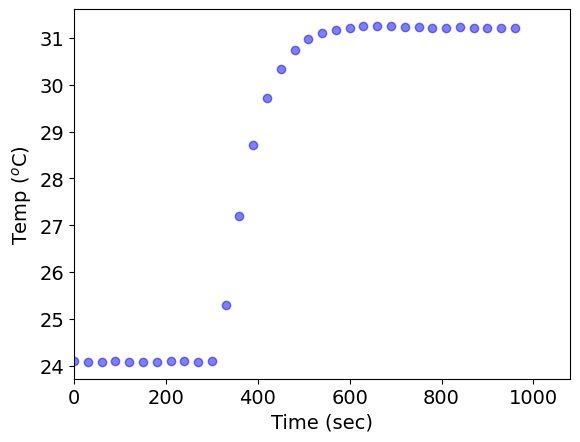

In [14]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_la_3336['Time (s)'], df_la_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'lauric acid')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1080)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 5 - plot of temp vs time for Lauric Acid during combustion

In [15]:
#@title Determine ΔT for Lauric Acid
# Linear Extrapolation of starting and ending
Number_Points_la = 10
Bomb_Cal_Initial_la = df_la_3336[df_la_3336.index.start:df_la_3336.index.start+Number_Points_la]
Bomb_Cal_Final_la = df_la_3336[df_la_3336.index.stop-1-Number_Points_la:df_la_3336.index.stop-1]

# Linear fits for initial and final data points
mi_la, bi_la = np.polyfit(Bomb_Cal_Initial_la['Time (s)'], Bomb_Cal_Initial_la['Temperature (C)'], deg=1)
mf_la, bf_la = np.polyfit(Bomb_Cal_Final_la['Time (s)'], Bomb_Cal_Final_la['Temperature (C)'], deg=1)

# Estimate Delta T from linear extrapolations
guess_temp_la = 375
dt_la = ((bf_la + mf_la * guess_temp_la) - (bi_la + mi_la * guess_temp_la))

# Estimate Delta T from max/min (good estimate if water temp is > room temp)
dt_est_la = df_la_3336['Temperature (C)'].max() - df_la_3336['Temperature (C)'].min()

# Estimate Delta T from linear extrapolations
guess_tmin_la = 300
guess_tmax_la = 500
dt_min_la = ((bf_la + mf_la * guess_tmin_la) - (bi_la + mi_la * guess_tmin_la))
dt_max_la = ((bf_la + mf_la * guess_tmax_la) - (bi_la + mi_la * guess_tmax_la))

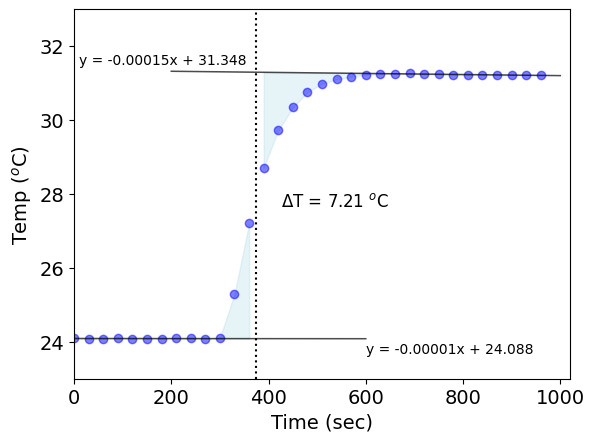

In [16]:
#@title Plot Data and ΔT Determination of Lauric Acid
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_la_3336['Time (s)'], df_la_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Lauric Acid')

# Create linear sequences for fit lines
xseq_initial_la = np.linspace(0, 600, num=10)
xseq_final_la = np.linspace(200, 1000, num=10)

# Plot extrapolation lines
ax.plot(xseq_initial_la, bi_la + mi_la * xseq_initial_la, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq_final_la, bf_la + mf_la * xseq_final_la, alpha=0.7, color="k", lw=1.1)

# Draw a vertical line for temperature change
ax.axvline(x=guess_temp_la, color='k', linestyle='dotted')

# Fill between data and linear extrapolations
ax.fill_between(df_la_3336['Time (s)'],bi_la + mi_la * df_la_3336['Time (s)'], df_la_3336['Temperature (C)'],where=df_la_3336['Time (s)']<=guess_temp_la , interpolate=True, color='lightblue', alpha=0.3)

ax.fill_between(df_la_3336['Time (s)'],bf_la + mf_la * df_la_3336['Time (s)'], df_la_3336['Temperature (C)'],where=df_la_3336['Time (s)']>=guess_temp_la , interpolate=True, color='lightblue', alpha=0.3)


# Annotate ΔT
ax.text(guess_temp_la+50, (df_la_3336['Temperature (C)'].min() + (df_la_3336['Temperature (C)'].max() - df_la_3336['Temperature (C)'].min())/2), '$\Delta$T = {} $^o$C'.format(round(dt_la, 2)), fontsize=12)

# Annotate regression lines with equations
ax.annotate(f'y = {mi_la:.5f}x + {bi_la:.3f}', xy=(xseq_initial_la[-1], bi_la + mi_la * xseq_initial_la[-1]), xytext=(600, bi_la + mi_la * xseq_initial_la[-1] - 0.4),fontsize=10)

ax.annotate(f'y = {mf_la:.5f}x + {bf_la:.3f}', xy=(xseq_final_la[0], bf_la + mf_la * xseq_final_la[0]), xytext=(10, bf_la + mf_la * xseq_final_la[0] + 0.2),fontsize=10)

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1020)
plt.ylim(23, 33)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 6 - plot of temp vs time for Lauric Acid with a linear least squares regression to determine delta T.

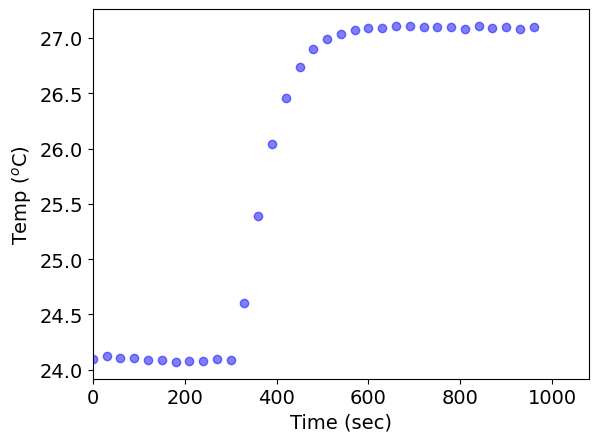

In [18]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_glu_3336['Time (s)'], df_glu_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Glucose')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1080)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 7 - plot of temp vs time during the combustion of glucose.

In [19]:
#@title Determine ΔT for Glucose
# Linear Extrapolation of starting and ending
Number_Points_glu = 10
Bomb_Cal_Initial_glu = df_glu_3336[df_glu_3336.index.start:df_glu_3336.index.start+Number_Points_glu]
Bomb_Cal_Final_glu = df_glu_3336[df_glu_3336.index.stop-1-Number_Points_glu:df_glu_3336.index.stop-1]

# Linear fits for initial and final data points
mi_glu, bi_glu = np.polyfit(Bomb_Cal_Initial_glu['Time (s)'], Bomb_Cal_Initial_glu['Temperature (C)'], deg=1)
mf_glu, bf_glu = np.polyfit(Bomb_Cal_Final_glu['Time (s)'], Bomb_Cal_Final_glu['Temperature (C)'], deg=1)

# Estimate Delta T from linear extrapolations
guess_temp_glu = 375
dt_glu = ((bf_glu + mf_glu * guess_temp_glu) - (bi_glu + mi_glu * guess_temp_glu))

# Estimate Delta T from max/min (good estimate if water temp is > room temp)
dt_est_glu = df_glu_3336['Temperature (C)'].max() - df_glu_3336['Temperature (C)'].min()

# Estimate Delta T from linear extrapolations
guess_tmin_glu = 300
guess_tmax_glu = 500
dt_min_glu = ((bf_glu + mf_glu * guess_tmin_glu) - (bi_glu + mi_glu * guess_tmin_glu))
dt_max_glu = ((bf_glu + mf_glu * guess_tmax_glu) - (bi_glu + mi_glu * guess_tmax_glu))

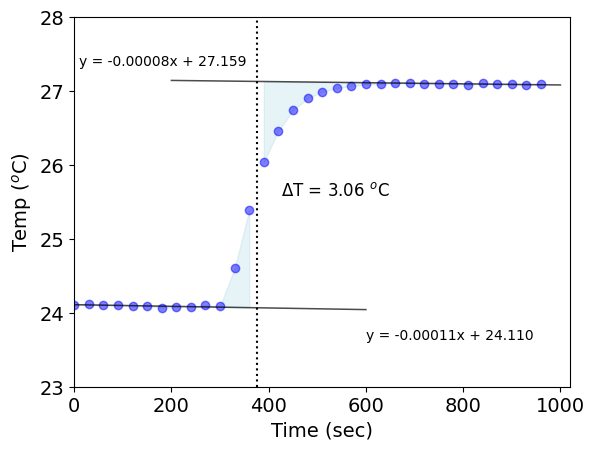

In [20]:
#@title Plot Data and ΔT Determination of Glucose
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_glu_3336['Time (s)'], df_glu_3336['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Glucose')

# Create linear sequences for fit lines
xseq_initial_glu = np.linspace(0, 600, num=10)
xseq_final_glu = np.linspace(200, 1000, num=10)

# Plot extrapolation lines
ax.plot(xseq_initial_glu, bi_glu + mi_glu * xseq_initial_glu, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq_final_glu, bf_glu + mf_glu * xseq_final_glu, alpha=0.7, color="k", lw=1.1)

# Draw a vertical line for temperature change
ax.axvline(x=guess_temp_glu, color='k', linestyle='dotted')

# Fill between data and linear extrapolations
ax.fill_between(df_glu_3336['Time (s)'],bi_glu + mi_glu * df_glu_3336['Time (s)'], df_glu_3336['Temperature (C)'],where=df_glu_3336['Time (s)']<=guess_temp_glu , interpolate=True, color='lightblue', alpha=0.3)

ax.fill_between(df_glu_3336['Time (s)'],bf_glu + mf_glu * df_glu_3336['Time (s)'], df_glu_3336['Temperature (C)'],where=df_glu_3336['Time (s)']>=guess_temp_glu , interpolate=True, color='lightblue', alpha=0.3)


# Annotate ΔT
ax.text(guess_temp_glu+50, (df_glu_3336['Temperature (C)'].min() + (df_glu_3336['Temperature (C)'].max() - df_glu_3336['Temperature (C)'].min())/2), '$\Delta$T = {} $^o$C'.format(round(dt_glu, 2)), fontsize=12)

# Annotate regression lines with equations
ax.annotate(f'y = {mi_glu:.5f}x + {bi_glu:.3f}', xy=(xseq_initial_glu[-1], bi_glu + mi_glu * xseq_initial_glu[-1]), xytext=(600, bi_glu + mi_glu * xseq_initial_glu[-1] - 0.4),fontsize=10)

ax.annotate(f'y = {mf_glu:.5f}x + {bf_glu:.3f}', xy=(xseq_final_glu[0], bf_glu + mf_glu * xseq_final_glu[0]), xytext=(10, bf_glu + mf_glu * xseq_final_glu[0] + 0.2),fontsize=10)

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1020)
plt.ylim(23, 28)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

Figure 8 - plot of temp vs time with a linear least squares regression during combustion of Glucose to determine delta T

# Determination of the Enthalpy of Combustion

In [21]:
#@title Determine Number of mols (n) burned
#Sample weights in grams
Wba = 2.0
Wnap = 2.0
Wla = 2.0
Wglu = 2.0

#Molar Masses of Samples g/mol
Mm_ba = 122.113
Mm_nap = 128.174
Mm_la = 200.311
Mm_glu = 180.126

#mols Burned of each sample in mols
n_ba = Wba/Mm_ba
n_nap = Wnap/Mm_nap
n_la = Wla/Mm_la
n_glu = Wglu/Mm_glu

#Print Results
print('Moles of Benzoic Acid burned =', round(n_ba,4), 'mols')
print('Moles of Naphthalene burned =', round(n_nap,4), 'mols')
print('Moles of Lauric burned =', round(n_la,4), 'mols')
print('Moles of Glucose burned =', round(n_glu,4), 'mols')


Moles of Benzoic Acid burned = 0.0164 mols
Moles of Naphthalene burned = 0.0156 mols
Moles of Lauric burned = 0.01 mols
Moles of Glucose burned = 0.0111 mols


In [39]:
#@title Calculate Total Energy Released for Each Combustion (delta U) in Joules (J)
#delta T of samples
dT_ba = 5.13
dT_nap = 7.83
dT_la = 7.21
dT_glu = 3.06

#change in wire weight for samples
Wfe_ba = 0.027-0.022
Wfe_nap = 0.027-0.020
Wfe_la = 0.024-0.016
Wfe_glu = 0.027-0.021

#total Energy released in combustion for each sample in Joules
du_ba = (Ceq*dT_ba)+(5858*Wfe_ba)
du_nap = (Ceq*dT_nap)+(5858*Wfe_nap)
du_la = (Ceq*dT_la)+(5858*Wfe_la)
du_glu = (Ceq*dT_glu)+(5858*Wfe_glu)

#print results
print('Energy Released for Benzoic Acid =', round(du_ba,2), 'J')
print('Energy Released for Naphthalene =', round(du_nap,2), 'J')
print('Energy Released for Lauric Acid =', round(du_la,2), 'J')
print('Energy Released for Glucose =', round(du_glu,2), 'J')


Energy Released for Benzoic Acid = 52499.46 J
Energy Released for Naphthalene = 80127.05 J
Energy Released for Lauric Acid = 73791.48 J
Energy Released for Glucose = 31333.14 J


In [38]:
#@title Energy Released per Mole Burned of Compound burned delta U bar
#total Energy divided by mols burned in J/mol
U_ba = du_ba/n_ba
U_nap = du_nap/n_nap
U_la = du_la/n_la
U_glu = du_glu/n_glu

print('Energy Released per Mole Burned of Benzoic Acid =', round(U_ba,2), 'J/mol')
print('Energy Released per Mole Burned of Naphthalene =', round(U_nap,2), 'J/mol')
print('Energy Released per Mole Burned of Lauric Acid =', round(U_la,2), 'J/mol')
print('Energy Released per Mole Burned of Glucose =', round(U_glu,2), 'J/mol')

Energy Released per Mole Burned of Benzoic Acid = 3205433.03 J/mol
Energy Released per Mole Burned of Naphthalene = 5135102.17 J/mol
Energy Released per Mole Burned of Lauric Acid = 7390622.89 J/mol
Energy Released per Mole Burned of Glucose = 2821956.74 J/mol


## Balance the Combustion Reaction and calculate delta N_gas

### Balanced Reaction for Benzoic Acid

$ C_6 H_5 COOH(s) + 7.5O_2(g) -> 7CO_2(g) + 3H_2O(l)$

### Balanced Reaction for Naphthalene

$C_{10}H_8(s) + 12O_2(g) -> 10CO_2(g) + 4H_2O(l)$

### Balanced Reaction for Lauric Acid


$CH_3(CH)_{10}COOH(s) + 16O_2(g) => 12CO_2(g) + 12H_2O(l)$

### Balanced Reaction for Glucose

$C_6H_{12}O_6(s) + 6O_2(g) => 6CO_2(g) + 6H_2O(l)$

In [27]:
#@title Change in Moles of Gas [$ΔN_gas = [moles CO_2 formed] - [moles O_2consumed$]]
# Moles of CO2 formed for each sample
n_co2_ba = 7
n_co2_nap = 10
n_co2_la = 12
n_co2_glu = 6

# Moles of O2 consumed for each sample
n_o2_ba = 7.5
n_o2_nap = 12
n_o2_la = 16
n_o2_glu = 6

# change in N of Gas
dN_ba = n_co2_ba - n_o2_ba
dN_nap = n_co2_nap - n_o2_nap
dN_la = n_co2_la - n_o2_la
dN_glu = n_co2_glu - n_o2_glu

# print results
print('Change in Moles (ΔN) for Benzoic Acid =', round(dN_ba,2))
print('Change in Moles (ΔN) for Naphthalene =', round(dN_nap,2))
print('Change in Moles (ΔN) for Lauric Acid =', round(dN_la,2))
print('Change in Moles (ΔN) for Glucose =', round(dN_glu,2))

Change in Moles (ΔN) for Benzoic Acid = -0.5
Change in Moles (ΔN) for Naphtahlene = -2
Change in Moles (ΔN) for Lauric Acid = -4
Change in Moles (ΔN) for Glucose = 0


##Calculate molar enthalpy of combustion ΔH bar

In [37]:
#@title Molar enthalpy of Combustion (ΔH_{comb}) for Samples in kJ/mol
# Ideal Gas Constant
R = 8.3145

#Heat of Combustion for each sample
q_ba = -(U_ba + (dN_ba)*R*(dT_ba))/1000
q_nap = -(U_nap + (dN_nap)*R*(dT_nap))/1000
q_la = -(U_la + (dN_la)*R*(dT_la))/1000
q_glu = -(U_glu + (dN_glu)*R*(dT_glu))/1000

# print results
print('Heat of Combustion (ΔH) for Benzoic Acid =', round(q_ba,2), 'kJ/mol')
print('Heat of Combustion (ΔH) for Naphthalene =', round(q_nap,2), 'kJ/mol')
print('Heat of Combustion (ΔH) for Lauric Acid =', round(q_la,2), 'kJ/mol')
print('Heat of Combustion (ΔH) for Glucose =', round(q_glu,2), 'kJ/mol')

Heat of Combustion (ΔH) for Benzoic Acid = -3205.41 kJ/mol
Heat of Combustion (ΔH) for Naphtahlene = -5134.97 kJ/mol
Heat of Combustion (ΔH) for Lauric Acid = -7390.38 kJ/mol
Heat of Combustion (ΔH) for Glucose = -2821.96 kJ/mol


## Error Analysis


In [33]:
std_dev_ba = np.std(df_ba_3336['Temperature (C)'])
std_dev_nap = np.std(df_nap_3336['Temperature (C)'])
std_dev_la = np.std(df_la_3336['Temperature (C)'])
std_dev_glu = np.std(df_glu_3336['Temperature (C)'])

print("Standard Deviation of Benzoic Acid Temperature:", std_dev_ba)
print("Standard Deviation of Naphthalene Temperature:", std_dev_nap)
print("Standard Deviation of Lauric Acid Temperature:", std_dev_la)
print("Standard Deviation of Glucose Temperature:", std_dev_glu)


Standard Deviation of Benzoic Acid Temperature: 2.350030459134804
Standard Deviation of Naphthalene Temperature: 3.567201834157949
Standard Deviation of Lauric Acid Temperature: 3.267970701656772
Standard Deviation of Glucose Temperature: 1.3743166262417008


In [34]:
error_dt_ba = np.sqrt(2 * std_dev_ba**2)
error_dt_nap = np.sqrt(2 * std_dev_nap**2)
error_dt_la = np.sqrt(2 * std_dev_la**2)
error_dt_glu = np.sqrt(2 * std_dev_glu**2)

print("Error in ΔT for Benzoic Acid:", error_dt_ba)
print("Error in ΔT for Naphthalene:", error_dt_nap)
print("Error in ΔT for Lauric Acid:", error_dt_la)
print("Error in ΔT for Glucose:", error_dt_glu)
#

Error in ΔT for Benzoic Acid: 3.323444947298311
Error in ΔT for Naphthalene: 5.0447852135883515
Error in ΔT for Lauric Acid: 4.621608487720926
Error in ΔT for Glucose: 1.9435772118258492


In [35]:
error_Ceq_ba = Ceq * (error_dt_ba / dt)


print("Error in Ceq for Benzoic Acid:", error_Ceq_ba)

#

Error in Ceq for Benzoic Acid: 6621.9225238221015


In [36]:


   # Error in ΔH for Benzoic Acid
   error_dH_ba = math.sqrt(((dT_ba / n_ba)**2 * error_Ceq_ba**2) + ((Ceq / n_ba)**2 * error_dt_ba**2))
   error_dH_nap = math.sqrt(((dT_nap / n_nap)**2 * error_Ceq_ba**2) + ((Ceq / n_nap)**2 * error_dt_ba**2))
   error_dH_la = math.sqrt(((dT_la / n_la)**2 * error_Ceq_ba**2) + ((Ceq / n_la)**2 * error_dt_ba**2))
   error_dH_glu = math.sqrt(((dT_glu / n_glu)**2 * error_Ceq_ba**2) + ((Ceq / n_glu)**2 * error_dt_ba**2))


   print("Error in ΔH for Benzoic Acid:", error_dH_ba, "kJ/mol")
   print("Error in ΔH for Naphthalene:", error_dH_nap, "kJ/mol")
   print("Error in ΔH for Lauric Acid:", error_dH_la, "kJ/mol")
   print("Error in ΔH for Glucose:", error_dH_glu, "kJ/mol")
#

Error in ΔH for Benzoic Acid: 2934198.290127316 kJ/mol
Error in ΔH for Naphtahlene: 3973331.479405786 kJ/mol
Error in ΔH for Lauric Acid: 5869990.625948929 kJ/mol
Error in ΔH for Glucose: 3564134.4224250447 kJ/mol
